In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

2025-06-13 14:52:08.604759: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12,13,14,15]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1749819132.785151 2958628 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


finding good initializer from train data


2025-06-13 14:52:13.347250: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:19.938533: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:26.149286: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:32.269325: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:38.164808: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:44.467732: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:50.354101: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:52:56.246696: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:53:02.314745: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:53:08.259625: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-13 14:53:14.101618: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.520 a 0.154  clct[41, 59] ans[53, 47] lr 0.250000 cl_acc 0.680 73.575sec(train) 6.744sec(infer)


Epoch 0 tst: l 4.535 a 0.142  clct[24, 16] ans[20, 20] cl_acc 0.650 2.474sec
result written at output/results.pickle


Epoch 10 tr: l 3.236 a 0.344  clct[79, 21] ans[54, 46] lr 0.226096 cl_acc 0.750 73.681sec(train) 7.069sec(infer)


Epoch 10 tst: l 3.300 a 0.349  clct[35, 5] ans[20, 20] cl_acc 0.625 2.581sec
result written at output/results.pickle


Epoch 20 tr: l 2.448 a 0.461  clct[45, 55] ans[45, 55] lr 0.204477 cl_acc 1.000 73.347sec(train) 6.001sec(infer)


Epoch 20 tst: l 2.442 a 0.483  clct[20, 20] ans[20, 20] cl_acc 1.000 2.301sec
result written at output/results.pickle


Epoch 30 tr: l 1.975 a 0.543  clct[48, 52] ans[48, 52] lr 0.184925 cl_acc 1.000 73.237sec(train) 6.601sec(infer)


Epoch 30 tst: l 1.963 a 0.548  clct[20, 20] ans[20, 20] cl_acc 1.000 2.477sec
result written at output/results.pickle


Epoch 40 tr: l 1.676 a 0.593  clct[51, 49] ans[51, 49] lr 0.167243 cl_acc 1.000 73.377sec(train) 6.028sec(infer)


Epoch 40 tst: l 1.662 a 0.603  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec
result written at output/results.pickle


Epoch 50 tr: l 1.431 a 0.645  clct[51, 49] ans[51, 49] lr 0.151252 cl_acc 1.000 73.472sec(train) 6.716sec(infer)


Epoch 50 tst: l 1.454 a 0.636  clct[20, 20] ans[20, 20] cl_acc 1.000 2.506sec
result written at output/results.pickle


Epoch 60 tr: l 1.267 a 0.682  clct[58, 42] ans[58, 42] lr 0.136789 cl_acc 1.000 73.176sec(train) 6.227sec(infer)


Epoch 60 tst: l 1.298 a 0.665  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec
result written at output/results.pickle


Epoch 70 tr: l 1.146 a 0.705  clct[53, 47] ans[53, 47] lr 0.123710 cl_acc 1.000 73.565sec(train) 6.768sec(infer)


Epoch 70 tst: l 1.211 a 0.681  clct[20, 20] ans[20, 20] cl_acc 1.000 2.530sec
result written at output/results.pickle


Epoch 80 tr: l 1.060 a 0.723  clct[48, 52] ans[48, 52] lr 0.111881 cl_acc 1.000 73.214sec(train) 6.591sec(infer)


Epoch 80 tst: l 1.101 a 0.706  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec
result written at output/results.pickle


Epoch 90 tr: l 0.978 a 0.744  clct[43, 57] ans[43, 57] lr 0.101183 cl_acc 1.000 72.740sec(train) 6.246sec(infer)


Epoch 90 tst: l 1.069 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec
result written at output/results.pickle


Epoch 100 tr: l 0.926 a 0.756  clct[53, 47] ans[53, 47] lr 0.091508 cl_acc 1.000 73.405sec(train) 6.058sec(infer)


Epoch 100 tst: l 1.022 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec
result written at output/results.pickle


Epoch 110 tr: l 0.877 a 0.767  clct[50, 50] ans[50, 50] lr 0.082758 cl_acc 1.000 74.287sec(train) 6.355sec(infer)


Epoch 110 tst: l 0.996 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec
result written at output/results.pickle


Epoch 120 tr: l 0.854 a 0.774  clct[49, 51] ans[49, 51] lr 0.074845 cl_acc 1.000 72.475sec(train) 6.770sec(infer)


Epoch 120 tst: l 0.961 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.567sec
result written at output/results.pickle


Epoch 130 tr: l 0.836 a 0.773  clct[48, 52] ans[48, 52] lr 0.067689 cl_acc 1.000 73.099sec(train) 6.795sec(infer)


Epoch 130 tst: l 0.940 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.542sec
result written at output/results.pickle


Epoch 140 tr: l 0.777 a 0.792  clct[49, 51] ans[49, 51] lr 0.061216 cl_acc 1.000 72.664sec(train) 6.642sec(infer)


Epoch 140 tst: l 0.895 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.618sec
result written at output/results.pickle


Epoch 150 tr: l 0.750 a 0.800  clct[54, 46] ans[54, 46] lr 0.055363 cl_acc 1.000 73.448sec(train) 6.612sec(infer)


Epoch 150 tst: l 0.880 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.461sec
result written at output/results.pickle


Epoch 160 tr: l 0.701 a 0.816  clct[50, 50] ans[50, 50] lr 0.050069 cl_acc 1.000 73.883sec(train) 6.729sec(infer)


Epoch 160 tst: l 0.893 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec
result written at output/results.pickle


Epoch 170 tr: l 0.705 a 0.813  clct[53, 47] ans[53, 47] lr 0.045282 cl_acc 1.000 73.565sec(train) 6.268sec(infer)


Epoch 170 tst: l 0.853 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec
result written at output/results.pickle


Epoch 180 tr: l 0.688 a 0.816  clct[49, 51] ans[49, 51] lr 0.040952 cl_acc 1.000 73.679sec(train) 6.902sec(infer)


Epoch 180 tst: l 0.840 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.693sec
result written at output/results.pickle


Epoch 190 tr: l 0.684 a 0.815  clct[53, 47] ans[53, 47] lr 0.037036 cl_acc 1.000 72.698sec(train) 6.494sec(infer)


Epoch 190 tst: l 0.841 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec
result written at output/results.pickle


Epoch 200 tr: l 0.642 a 0.829  clct[52, 48] ans[52, 48] lr 0.033495 cl_acc 1.000 73.315sec(train) 6.603sec(infer)


Epoch 200 tst: l 0.836 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.487sec
result written at output/results.pickle


Epoch 210 tr: l 0.638 a 0.829  clct[51, 49] ans[51, 49] lr 0.030292 cl_acc 1.000 73.101sec(train) 6.631sec(infer)


Epoch 210 tst: l 0.826 a 0.770  clct[20, 20] ans[20, 20] cl_acc 1.000 2.480sec
result written at output/results.pickle


Epoch 220 tr: l 0.662 a 0.819  clct[46, 54] ans[46, 54] lr 0.027396 cl_acc 1.000 72.844sec(train) 6.793sec(infer)


Epoch 220 tst: l 0.804 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.537sec
result written at output/results.pickle


Epoch 230 tr: l 0.599 a 0.841  clct[44, 56] ans[44, 56] lr 0.024776 cl_acc 1.000 73.453sec(train) 6.857sec(infer)


Epoch 230 tst: l 0.811 a 0.773  clct[20, 20] ans[20, 20] cl_acc 1.000 2.535sec
result written at output/results.pickle


Epoch 240 tr: l 0.597 a 0.841  clct[45, 55] ans[45, 55] lr 0.022407 cl_acc 1.000 73.292sec(train) 6.664sec(infer)


Epoch 240 tst: l 0.795 a 0.779  clct[20, 20] ans[20, 20] cl_acc 1.000 2.597sec
result written at output/results.pickle


Epoch 250 tr: l 0.603 a 0.837  clct[51, 49] ans[51, 49] lr 0.020265 cl_acc 1.000 73.579sec(train) 6.418sec(infer)


Epoch 250 tst: l 0.795 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.380sec
result written at output/results.pickle


Epoch 260 tr: l 0.604 a 0.835  clct[50, 50] ans[50, 50] lr 0.018327 cl_acc 1.000 72.771sec(train) 6.725sec(infer)


Epoch 260 tst: l 0.777 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.558sec
result written at output/results.pickle


Epoch 270 tr: l 0.592 a 0.841  clct[53, 47] ans[53, 47] lr 0.016575 cl_acc 1.000 74.254sec(train) 6.706sec(infer)


Epoch 270 tst: l 0.775 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec
result written at output/results.pickle


Epoch 280 tr: l 0.600 a 0.837  clct[44, 56] ans[44, 56] lr 0.014990 cl_acc 1.000 73.131sec(train) 6.819sec(infer)


Epoch 280 tst: l 0.778 a 0.782  clct[20, 20] ans[20, 20] cl_acc 1.000 2.686sec
result written at output/results.pickle


Epoch 290 tr: l 0.591 a 0.839  clct[49, 51] ans[49, 51] lr 0.013556 cl_acc 1.000 73.045sec(train) 5.974sec(infer)


Epoch 290 tst: l 0.776 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.211sec
result written at output/results.pickle


Epoch 300 tr: l 0.569 a 0.845  clct[53, 47] ans[53, 47] lr 0.012260 cl_acc 1.000 73.033sec(train) 6.778sec(infer)


Epoch 300 tst: l 0.771 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec
result written at output/results.pickle


Epoch 310 tr: l 0.568 a 0.846  clct[56, 44] ans[56, 44] lr 0.011088 cl_acc 1.000 72.596sec(train) 6.389sec(infer)


Epoch 310 tst: l 0.772 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec
result written at output/results.pickle


Epoch 320 tr: l 0.531 a 0.860  clct[52, 48] ans[52, 48] lr 0.010028 cl_acc 1.000 73.405sec(train) 6.305sec(infer)


Epoch 320 tst: l 0.767 a 0.788  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec
result written at output/results.pickle


Epoch 330 tr: l 0.579 a 0.843  clct[50, 50] ans[50, 50] lr 0.009069 cl_acc 1.000 73.589sec(train) 6.763sec(infer)


Epoch 330 tst: l 0.759 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.527sec
result written at output/results.pickle


Epoch 340 tr: l 0.562 a 0.847  clct[51, 49] ans[51, 49] lr 0.008202 cl_acc 1.000 73.190sec(train) 6.927sec(infer)


Epoch 340 tst: l 0.757 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.570sec
result written at output/results.pickle


Epoch 350 tr: l 0.529 a 0.857  clct[50, 50] ans[50, 50] lr 0.007418 cl_acc 1.000 74.844sec(train) 6.659sec(infer)


Epoch 350 tst: l 0.758 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.553sec
result written at output/results.pickle


Epoch 360 tr: l 0.545 a 0.851  clct[50, 50] ans[50, 50] lr 0.006708 cl_acc 1.000 73.573sec(train) 6.833sec(infer)


Epoch 360 tst: l 0.757 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.599sec
result written at output/results.pickle


Epoch 370 tr: l 0.537 a 0.854  clct[49, 51] ans[49, 51] lr 0.006067 cl_acc 1.000 74.164sec(train) 6.282sec(infer)


Epoch 370 tst: l 0.757 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec
result written at output/results.pickle


Epoch 380 tr: l 0.539 a 0.853  clct[47, 53] ans[47, 53] lr 0.005487 cl_acc 1.000 73.638sec(train) 6.712sec(infer)


Epoch 380 tst: l 0.748 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.534sec
result written at output/results.pickle


Epoch 390 tr: l 0.512 a 0.864  clct[46, 54] ans[46, 54] lr 0.004962 cl_acc 1.000 73.848sec(train) 6.671sec(infer)


Epoch 390 tst: l 0.749 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.618sec
result written at output/results.pickle


Epoch 400 tr: l 0.523 a 0.858  clct[56, 44] ans[56, 44] lr 0.004488 cl_acc 1.000 72.867sec(train) 6.711sec(infer)


Epoch 400 tst: l 0.745 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.504sec
result written at output/results.pickle


Epoch 410 tr: l 0.527 a 0.857  clct[51, 49] ans[51, 49] lr 0.004059 cl_acc 1.000 74.650sec(train) 6.915sec(infer)


Epoch 410 tst: l 0.747 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.565sec
result written at output/results.pickle


Epoch 420 tr: l 0.535 a 0.853  clct[59, 41] ans[59, 41] lr 0.003670 cl_acc 1.000 72.879sec(train) 6.178sec(infer)


Epoch 420 tst: l 0.743 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.289sec
result written at output/results.pickle


Epoch 430 tr: l 0.524 a 0.856  clct[49, 51] ans[49, 51] lr 0.003320 cl_acc 1.000 73.666sec(train) 6.322sec(infer)


Epoch 430 tst: l 0.740 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec
result written at output/results.pickle


Epoch 440 tr: l 0.555 a 0.847  clct[49, 51] ans[49, 51] lr 0.003002 cl_acc 1.000 73.785sec(train) 6.742sec(infer)


Epoch 440 tst: l 0.742 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.618sec
result written at output/results.pickle


Epoch 450 tr: l 0.505 a 0.863  clct[49, 51] ans[49, 51] lr 0.002715 cl_acc 1.000 73.339sec(train) 6.756sec(infer)


Epoch 450 tst: l 0.742 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.539sec
result written at output/results.pickle


Epoch 460 tr: l 0.529 a 0.854  clct[54, 46] ans[54, 46] lr 0.002455 cl_acc 1.000 74.802sec(train) 6.501sec(infer)


Epoch 460 tst: l 0.742 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.535sec
result written at output/results.pickle


Epoch 470 tr: l 0.533 a 0.853  clct[46, 54] ans[46, 54] lr 0.002221 cl_acc 1.000 73.510sec(train) 6.594sec(infer)


Epoch 470 tst: l 0.736 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.509sec
result written at output/results.pickle


Epoch 480 tr: l 0.507 a 0.862  clct[57, 43] ans[57, 43] lr 0.002008 cl_acc 1.000 73.358sec(train) 6.590sec(infer)


Epoch 480 tst: l 0.742 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.478sec
result written at output/results.pickle


Epoch 490 tr: l 0.536 a 0.851  clct[44, 56] ans[44, 56] lr 0.001816 cl_acc 1.000 73.090sec(train) 6.738sec(infer)


Epoch 490 tst: l 0.736 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.563sec
result written at output/results.pickle


Epoch 500 tr: l 0.521 a 0.857  clct[47, 53] ans[47, 53] lr 0.001643 cl_acc 1.000 73.935sec(train) 6.236sec(infer)


Epoch 500 tst: l 0.734 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec
result written at output/results.pickle


Epoch 510 tr: l 0.539 a 0.851  clct[49, 51] ans[49, 51] lr 0.001486 cl_acc 1.000 73.495sec(train) 6.628sec(infer)


Epoch 510 tst: l 0.734 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.643sec
result written at output/results.pickle


Epoch 520 tr: l 0.526 a 0.853  clct[49, 51] ans[49, 51] lr 0.001344 cl_acc 1.000 73.382sec(train) 6.568sec(infer)


Epoch 520 tst: l 0.735 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.486sec
result written at output/results.pickle


Epoch 530 tr: l 0.554 a 0.843  clct[57, 43] ans[57, 43] lr 0.001215 cl_acc 1.000 73.531sec(train) 6.598sec(infer)


Epoch 530 tst: l 0.730 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.431sec
result written at output/results.pickle


Epoch 540 tr: l 0.544 a 0.847  clct[48, 52] ans[48, 52] lr 0.001099 cl_acc 1.000 73.314sec(train) 6.801sec(infer)


Epoch 540 tst: l 0.730 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.557sec
result written at output/results.pickle


Epoch 550 tr: l 0.555 a 0.844  clct[45, 55] ans[45, 55] lr 0.000994 cl_acc 1.000 72.943sec(train) 6.440sec(infer)


Epoch 550 tst: l 0.727 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.514sec
result written at output/results.pickle


Epoch 560 tr: l 0.553 a 0.844  clct[44, 56] ans[44, 56] lr 0.000899 cl_acc 1.000 72.631sec(train) 6.539sec(infer)


Epoch 560 tst: l 0.727 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.460sec
result written at output/results.pickle


Epoch 570 tr: l 0.536 a 0.850  clct[47, 53] ans[47, 53] lr 0.000813 cl_acc 1.000 73.620sec(train) 6.311sec(infer)


Epoch 570 tst: l 0.725 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec
result written at output/results.pickle


Epoch 580 tr: l 0.534 a 0.850  clct[52, 48] ans[52, 48] lr 0.000735 cl_acc 1.000 73.605sec(train) 6.735sec(infer)


Epoch 580 tst: l 0.726 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.563sec
result written at output/results.pickle


Epoch 590 tr: l 0.531 a 0.851  clct[50, 50] ans[50, 50] lr 0.000665 cl_acc 1.000 74.230sec(train) 6.044sec(infer)


Epoch 590 tst: l 0.724 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.259sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 13.77 hour (49581.772 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 12---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 12, 'train_seed': 12, 'project_dir': 'output'}


finding good initializer from train data


2025-06-14 04:38:34.570635: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 04:38:41.094958: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 04:38:48.234947: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.526 a 0.140  clct[60, 40] ans[51, 49] lr 0.250000 cl_acc 0.510 72.403sec(train) 6.015sec(infer)


Epoch 0 tst: l 4.564 a 0.133  clct[23, 17] ans[20, 20] cl_acc 0.625 2.283sec
result written at output/results.pickle


Epoch 10 tr: l 3.253 a 0.342  clct[96, 4] ans[50, 50] lr 0.226096 cl_acc 0.540 72.701sec(train) 5.897sec(infer)


Epoch 10 tst: l 3.247 a 0.361  clct[40, 0] ans[20, 20] cl_acc 0.500 2.218sec
result written at output/results.pickle


Epoch 20 tr: l 2.583 a 0.406  clct[100, 0] ans[46, 54] lr 0.204477 cl_acc 0.540 71.624sec(train) 5.984sec(infer)


Epoch 20 tst: l 2.550 a 0.430  clct[40, 0] ans[20, 20] cl_acc 0.500 2.293sec
result written at output/results.pickle


Epoch 30 tr: l 2.182 a 0.454  clct[100, 0] ans[42, 58] lr 0.184925 cl_acc 0.580 72.556sec(train) 5.959sec(infer)


Epoch 30 tst: l 2.139 a 0.473  clct[40, 0] ans[20, 20] cl_acc 0.500 2.229sec
result written at output/results.pickle


Epoch 40 tr: l 1.915 a 0.492  clct[100, 0] ans[52, 48] lr 0.167243 cl_acc 0.520 71.816sec(train) 6.149sec(infer)


Epoch 40 tst: l 1.877 a 0.506  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec
result written at output/results.pickle


Epoch 50 tr: l 1.701 a 0.532  clct[100, 0] ans[46, 54] lr 0.151252 cl_acc 0.540 71.905sec(train) 6.468sec(infer)


Epoch 50 tst: l 1.664 a 0.544  clct[40, 0] ans[20, 20] cl_acc 0.500 2.387sec
result written at output/results.pickle


Epoch 60 tr: l 1.548 a 0.567  clct[100, 0] ans[49, 51] lr 0.136789 cl_acc 0.510 71.641sec(train) 6.530sec(infer)


Epoch 60 tst: l 1.524 a 0.575  clct[40, 0] ans[20, 20] cl_acc 0.500 2.357sec
result written at output/results.pickle


Epoch 70 tr: l 1.445 a 0.588  clct[100, 0] ans[53, 47] lr 0.123710 cl_acc 0.530 71.745sec(train) 6.132sec(infer)


Epoch 70 tst: l 1.403 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.359sec
result written at output/results.pickle


Epoch 80 tr: l 1.318 a 0.623  clct[100, 0] ans[49, 51] lr 0.111881 cl_acc 0.510 72.257sec(train) 6.267sec(infer)


Epoch 80 tst: l 1.334 a 0.615  clct[40, 0] ans[20, 20] cl_acc 0.500 2.517sec
result written at output/results.pickle


Epoch 90 tr: l 1.287 a 0.625  clct[100, 0] ans[53, 47] lr 0.101183 cl_acc 0.530 71.803sec(train) 6.157sec(infer)


Epoch 90 tst: l 1.267 a 0.627  clct[40, 0] ans[20, 20] cl_acc 0.500 2.315sec
result written at output/results.pickle


Epoch 100 tr: l 1.208 a 0.647  clct[100, 0] ans[53, 47] lr 0.091508 cl_acc 0.530 73.123sec(train) 6.316sec(infer)


Epoch 100 tst: l 1.213 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.277sec
result written at output/results.pickle


Epoch 110 tr: l 1.154 a 0.663  clct[100, 0] ans[45, 55] lr 0.082758 cl_acc 0.550 72.776sec(train) 6.559sec(infer)


Epoch 110 tst: l 1.188 a 0.645  clct[40, 0] ans[20, 20] cl_acc 0.500 2.431sec
result written at output/results.pickle


Epoch 120 tr: l 1.104 a 0.678  clct[100, 0] ans[53, 47] lr 0.074845 cl_acc 0.530 71.871sec(train) 6.387sec(infer)


Epoch 120 tst: l 1.136 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.553sec
result written at output/results.pickle


Epoch 130 tr: l 1.095 a 0.678  clct[100, 0] ans[47, 53] lr 0.067689 cl_acc 0.530 71.872sec(train) 5.933sec(infer)


Epoch 130 tst: l 1.098 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.289sec
result written at output/results.pickle


Epoch 140 tr: l 1.052 a 0.692  clct[100, 0] ans[46, 54] lr 0.061216 cl_acc 0.540 72.918sec(train) 6.498sec(infer)


Epoch 140 tst: l 1.083 a 0.677  clct[40, 0] ans[20, 20] cl_acc 0.500 2.425sec
result written at output/results.pickle


Epoch 150 tr: l 1.014 a 0.702  clct[100, 0] ans[52, 48] lr 0.055363 cl_acc 0.520 72.352sec(train) 6.025sec(infer)


Epoch 150 tst: l 1.060 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.288sec
result written at output/results.pickle


Epoch 160 tr: l 0.982 a 0.712  clct[100, 0] ans[51, 49] lr 0.050069 cl_acc 0.510 71.980sec(train) 6.721sec(infer)


Epoch 160 tst: l 1.024 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.554sec
result written at output/results.pickle


Epoch 170 tr: l 0.970 a 0.713  clct[100, 0] ans[44, 56] lr 0.045282 cl_acc 0.560 72.229sec(train) 6.385sec(infer)


Epoch 170 tst: l 1.009 a 0.699  clct[40, 0] ans[20, 20] cl_acc 0.500 2.479sec
result written at output/results.pickle


Epoch 180 tr: l 0.927 a 0.728  clct[100, 0] ans[48, 52] lr 0.040952 cl_acc 0.520 72.381sec(train) 6.410sec(infer)


Epoch 180 tst: l 1.013 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.332sec
result written at output/results.pickle


Epoch 190 tr: l 0.926 a 0.727  clct[100, 0] ans[48, 52] lr 0.037036 cl_acc 0.520 72.260sec(train) 6.562sec(infer)


Epoch 190 tst: l 0.988 a 0.704  clct[40, 0] ans[20, 20] cl_acc 0.500 2.587sec
result written at output/results.pickle


Epoch 200 tr: l 0.940 a 0.720  clct[100, 0] ans[49, 51] lr 0.033495 cl_acc 0.510 72.537sec(train) 6.282sec(infer)


Epoch 200 tst: l 0.964 a 0.710  clct[40, 0] ans[20, 20] cl_acc 0.500 2.550sec
result written at output/results.pickle


Epoch 210 tr: l 0.883 a 0.740  clct[100, 0] ans[47, 53] lr 0.030292 cl_acc 0.530 71.726sec(train) 6.214sec(infer)


Epoch 210 tst: l 0.966 a 0.711  clct[40, 0] ans[20, 20] cl_acc 0.500 2.353sec
result written at output/results.pickle


Epoch 220 tr: l 0.909 a 0.728  clct[100, 0] ans[42, 58] lr 0.027396 cl_acc 0.580 72.251sec(train) 6.311sec(infer)


Epoch 220 tst: l 0.958 a 0.713  clct[40, 0] ans[20, 20] cl_acc 0.500 2.449sec
result written at output/results.pickle


Epoch 230 tr: l 0.872 a 0.741  clct[100, 0] ans[49, 51] lr 0.024776 cl_acc 0.510 71.828sec(train) 6.497sec(infer)


Epoch 230 tst: l 0.948 a 0.714  clct[40, 0] ans[20, 20] cl_acc 0.500 2.378sec
result written at output/results.pickle


Epoch 240 tr: l 0.870 a 0.743  clct[100, 0] ans[50, 50] lr 0.022407 cl_acc 0.500 71.289sec(train) 6.147sec(infer)


Epoch 240 tst: l 0.928 a 0.723  clct[40, 0] ans[20, 20] cl_acc 0.500 2.388sec
result written at output/results.pickle


Epoch 250 tr: l 0.869 a 0.741  clct[100, 0] ans[42, 58] lr 0.020265 cl_acc 0.580 71.890sec(train) 6.371sec(infer)


Epoch 250 tst: l 0.921 a 0.725  clct[40, 0] ans[20, 20] cl_acc 0.500 2.230sec
result written at output/results.pickle


Epoch 260 tr: l 0.866 a 0.742  clct[100, 0] ans[50, 50] lr 0.018327 cl_acc 0.500 71.913sec(train) 6.551sec(infer)


Epoch 260 tst: l 0.914 a 0.726  clct[40, 0] ans[20, 20] cl_acc 0.500 2.513sec
result written at output/results.pickle


Epoch 270 tr: l 0.837 a 0.749  clct[100, 0] ans[48, 52] lr 0.016575 cl_acc 0.520 71.262sec(train) 6.377sec(infer)


Epoch 270 tst: l 0.910 a 0.728  clct[40, 0] ans[20, 20] cl_acc 0.500 2.491sec
result written at output/results.pickle


Epoch 280 tr: l 0.834 a 0.750  clct[100, 0] ans[53, 47] lr 0.014990 cl_acc 0.530 71.443sec(train) 6.380sec(infer)


Epoch 280 tst: l 0.914 a 0.724  clct[40, 0] ans[20, 20] cl_acc 0.500 2.285sec
result written at output/results.pickle


Epoch 290 tr: l 0.830 a 0.752  clct[100, 0] ans[41, 59] lr 0.013556 cl_acc 0.590 72.470sec(train) 6.056sec(infer)


Epoch 290 tst: l 0.901 a 0.730  clct[40, 0] ans[20, 20] cl_acc 0.500 2.374sec
result written at output/results.pickle


Epoch 300 tr: l 0.820 a 0.756  clct[100, 0] ans[44, 56] lr 0.012260 cl_acc 0.560 71.804sec(train) 6.506sec(infer)


Epoch 300 tst: l 0.890 a 0.732  clct[40, 0] ans[20, 20] cl_acc 0.500 2.492sec
result written at output/results.pickle


Epoch 310 tr: l 0.815 a 0.757  clct[100, 0] ans[45, 55] lr 0.011088 cl_acc 0.550 71.886sec(train) 6.557sec(infer)


Epoch 310 tst: l 0.894 a 0.731  clct[40, 0] ans[20, 20] cl_acc 0.500 2.462sec
result written at output/results.pickle


Epoch 320 tr: l 0.818 a 0.755  clct[100, 0] ans[51, 49] lr 0.010028 cl_acc 0.510 72.210sec(train) 6.456sec(infer)


Epoch 320 tst: l 0.878 a 0.736  clct[40, 0] ans[20, 20] cl_acc 0.500 2.399sec
result written at output/results.pickle


Epoch 330 tr: l 0.780 a 0.767  clct[100, 0] ans[46, 54] lr 0.009069 cl_acc 0.540 71.992sec(train) 6.240sec(infer)


Epoch 330 tst: l 0.879 a 0.735  clct[40, 0] ans[20, 20] cl_acc 0.500 2.345sec
result written at output/results.pickle


Epoch 340 tr: l 0.778 a 0.768  clct[100, 0] ans[43, 57] lr 0.008202 cl_acc 0.570 71.866sec(train) 6.448sec(infer)


Epoch 340 tst: l 0.874 a 0.735  clct[40, 0] ans[20, 20] cl_acc 0.500 2.470sec
result written at output/results.pickle


Epoch 350 tr: l 0.804 a 0.757  clct[100, 0] ans[47, 53] lr 0.007418 cl_acc 0.530 71.681sec(train) 7.002sec(infer)


Epoch 350 tst: l 0.876 a 0.736  clct[40, 0] ans[20, 20] cl_acc 0.500 2.550sec
result written at output/results.pickle


Epoch 360 tr: l 0.783 a 0.762  clct[100, 0] ans[53, 47] lr 0.006708 cl_acc 0.530 71.828sec(train) 6.442sec(infer)


Epoch 360 tst: l 0.865 a 0.739  clct[40, 0] ans[20, 20] cl_acc 0.500 2.315sec
result written at output/results.pickle


Epoch 370 tr: l 0.794 a 0.760  clct[100, 0] ans[42, 58] lr 0.006067 cl_acc 0.580 72.067sec(train) 6.585sec(infer)


Epoch 370 tst: l 0.865 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.388sec
result written at output/results.pickle


Epoch 380 tr: l 0.774 a 0.767  clct[100, 0] ans[56, 44] lr 0.005487 cl_acc 0.560 71.402sec(train) 6.220sec(infer)


Epoch 380 tst: l 0.873 a 0.740  clct[40, 0] ans[20, 20] cl_acc 0.500 2.447sec
result written at output/results.pickle


Epoch 390 tr: l 0.816 a 0.754  clct[100, 0] ans[52, 48] lr 0.004962 cl_acc 0.520 71.801sec(train) 6.498sec(infer)


Epoch 390 tst: l 0.870 a 0.738  clct[40, 0] ans[20, 20] cl_acc 0.500 2.679sec
result written at output/results.pickle


Epoch 400 tr: l 0.753 a 0.775  clct[100, 0] ans[45, 55] lr 0.004488 cl_acc 0.550 73.511sec(train) 6.591sec(infer)


Epoch 400 tst: l 0.867 a 0.739  clct[40, 0] ans[20, 20] cl_acc 0.500 2.321sec
result written at output/results.pickle


Epoch 410 tr: l 0.771 a 0.768  clct[100, 0] ans[49, 51] lr 0.004059 cl_acc 0.510 71.442sec(train) 6.537sec(infer)


Epoch 410 tst: l 0.865 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.380sec
result written at output/results.pickle


Epoch 420 tr: l 0.758 a 0.772  clct[100, 0] ans[52, 48] lr 0.003670 cl_acc 0.520 71.668sec(train) 6.322sec(infer)


Epoch 420 tst: l 0.856 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.505sec
result written at output/results.pickle


Epoch 430 tr: l 0.762 a 0.772  clct[100, 0] ans[52, 48] lr 0.003320 cl_acc 0.520 72.141sec(train) 6.296sec(infer)


Epoch 430 tst: l 0.858 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.499sec
result written at output/results.pickle


Epoch 440 tr: l 0.778 a 0.765  clct[100, 0] ans[48, 52] lr 0.003002 cl_acc 0.520 71.747sec(train) 6.359sec(infer)


Epoch 440 tst: l 0.854 a 0.743  clct[40, 0] ans[20, 20] cl_acc 0.500 2.508sec
result written at output/results.pickle


Epoch 450 tr: l 0.780 a 0.764  clct[100, 0] ans[55, 45] lr 0.002715 cl_acc 0.550 72.046sec(train) 6.452sec(infer)


Epoch 450 tst: l 0.845 a 0.745  clct[40, 0] ans[20, 20] cl_acc 0.500 2.369sec
result written at output/results.pickle


Epoch 460 tr: l 0.773 a 0.765  clct[100, 0] ans[47, 53] lr 0.002455 cl_acc 0.530 71.709sec(train) 6.415sec(infer)


Epoch 460 tst: l 0.851 a 0.743  clct[40, 0] ans[20, 20] cl_acc 0.500 2.400sec
result written at output/results.pickle


Epoch 470 tr: l 0.769 a 0.767  clct[100, 0] ans[49, 51] lr 0.002221 cl_acc 0.510 72.165sec(train) 6.200sec(infer)


Epoch 470 tst: l 0.843 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec
result written at output/results.pickle


Epoch 480 tr: l 0.771 a 0.765  clct[100, 0] ans[46, 54] lr 0.002008 cl_acc 0.540 71.992sec(train) 6.366sec(infer)


Epoch 480 tst: l 0.843 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.485sec
result written at output/results.pickle


Epoch 490 tr: l 0.765 a 0.766  clct[100, 0] ans[48, 52] lr 0.001816 cl_acc 0.520 71.679sec(train) 6.214sec(infer)


Epoch 490 tst: l 0.836 a 0.747  clct[40, 0] ans[20, 20] cl_acc 0.500 2.452sec
result written at output/results.pickle


Epoch 500 tr: l 0.753 a 0.773  clct[100, 0] ans[49, 51] lr 0.001643 cl_acc 0.510 71.814sec(train) 6.688sec(infer)


Epoch 500 tst: l 0.835 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.284sec
result written at output/results.pickle


Epoch 510 tr: l 0.790 a 0.757  clct[100, 0] ans[43, 57] lr 0.001486 cl_acc 0.570 72.177sec(train) 6.840sec(infer)


Epoch 510 tst: l 0.833 a 0.750  clct[40, 0] ans[20, 20] cl_acc 0.500 2.546sec
result written at output/results.pickle


Epoch 520 tr: l 0.761 a 0.769  clct[100, 0] ans[52, 48] lr 0.001344 cl_acc 0.520 71.853sec(train) 6.460sec(infer)


Epoch 520 tst: l 0.834 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.426sec
result written at output/results.pickle


Epoch 530 tr: l 0.758 a 0.768  clct[100, 0] ans[50, 50] lr 0.001215 cl_acc 0.500 72.125sec(train) 6.214sec(infer)


Epoch 530 tst: l 0.830 a 0.747  clct[40, 0] ans[20, 20] cl_acc 0.500 2.423sec
result written at output/results.pickle


Epoch 540 tr: l 0.773 a 0.764  clct[100, 0] ans[57, 43] lr 0.001099 cl_acc 0.570 71.995sec(train) 6.522sec(infer)


Epoch 540 tst: l 0.839 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec
result written at output/results.pickle


Epoch 550 tr: l 0.768 a 0.766  clct[100, 0] ans[47, 53] lr 0.000994 cl_acc 0.530 72.152sec(train) 6.520sec(infer)


Epoch 550 tst: l 0.831 a 0.749  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec
result written at output/results.pickle


Epoch 560 tr: l 0.760 a 0.769  clct[100, 0] ans[47, 53] lr 0.000899 cl_acc 0.530 72.169sec(train) 6.702sec(infer)


Epoch 560 tst: l 0.827 a 0.750  clct[40, 0] ans[20, 20] cl_acc 0.500 2.485sec
result written at output/results.pickle


Epoch 570 tr: l 0.756 a 0.773  clct[100, 0] ans[45, 55] lr 0.000813 cl_acc 0.550 71.433sec(train) 6.443sec(infer)


Epoch 570 tst: l 0.829 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec
result written at output/results.pickle


Epoch 580 tr: l 0.778 a 0.763  clct[100, 0] ans[53, 47] lr 0.000735 cl_acc 0.530 71.838sec(train) 6.742sec(infer)


Epoch 580 tst: l 0.825 a 0.749  clct[40, 0] ans[20, 20] cl_acc 0.500 2.365sec
result written at output/results.pickle


Epoch 590 tr: l 0.784 a 0.760  clct[100, 0] ans[42, 58] lr 0.000665 cl_acc 0.580 71.636sec(train) 6.447sec(infer)


Epoch 590 tst: l 0.831 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 13.47 hour (48505.914 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 13---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 13, 'train_seed': 13, 'project_dir': 'output'}


finding good initializer from train data


2025-06-14 18:07:00.773034: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:07.895853: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:14.940631: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:21.819585: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:28.680031: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:35.851222: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:42.503588: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:48.653568: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:07:55.102312: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:02.240857: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:09.032679: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:15.689887: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:21.847073: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:28.097148: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:34.373727: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:40.551700: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-14 18:08:46.718007: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.516 a 0.146  clct[53, 47] ans[51, 49] lr 0.250000 cl_acc 0.680 73.739sec(train) 6.761sec(infer)


Epoch 0 tst: l 4.557 a 0.126  clct[13, 27] ans[20, 20] cl_acc 0.575 2.666sec
result written at output/results.pickle


Epoch 10 tr: l 3.249 a 0.344  clct[99, 1] ans[49, 51] lr 0.226096 cl_acc 0.520 72.562sec(train) 5.956sec(infer)


Epoch 10 tst: l 3.206 a 0.356  clct[40, 0] ans[20, 20] cl_acc 0.500 2.239sec
result written at output/results.pickle


Epoch 20 tr: l 2.576 a 0.405  clct[100, 0] ans[55, 45] lr 0.204477 cl_acc 0.550 73.628sec(train) 6.725sec(infer)


Epoch 20 tst: l 2.531 a 0.433  clct[40, 0] ans[20, 20] cl_acc 0.500 2.551sec
result written at output/results.pickle


Epoch 30 tr: l 2.165 a 0.463  clct[100, 0] ans[49, 51] lr 0.184925 cl_acc 0.510 74.114sec(train) 6.675sec(infer)


Epoch 30 tst: l 2.112 a 0.481  clct[40, 0] ans[20, 20] cl_acc 0.500 2.555sec
result written at output/results.pickle


Epoch 40 tr: l 1.889 a 0.508  clct[100, 0] ans[49, 51] lr 0.167243 cl_acc 0.510 73.294sec(train) 6.712sec(infer)


Epoch 40 tst: l 1.840 a 0.522  clct[40, 0] ans[20, 20] cl_acc 0.500 2.637sec
result written at output/results.pickle


Epoch 50 tr: l 1.696 a 0.540  clct[100, 0] ans[53, 47] lr 0.151252 cl_acc 0.530 74.181sec(train) 6.768sec(infer)


Epoch 50 tst: l 1.666 a 0.546  clct[40, 0] ans[20, 20] cl_acc 0.500 2.534sec
result written at output/results.pickle


Epoch 60 tr: l 1.542 a 0.571  clct[100, 0] ans[47, 53] lr 0.136789 cl_acc 0.530 74.148sec(train) 6.583sec(infer)


Epoch 60 tst: l 1.511 a 0.579  clct[40, 0] ans[20, 20] cl_acc 0.500 2.578sec
result written at output/results.pickle


Epoch 70 tr: l 1.413 a 0.605  clct[99, 1] ans[58, 42] lr 0.123710 cl_acc 0.570 74.406sec(train) 6.756sec(infer)


Epoch 70 tst: l 1.401 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.663sec
result written at output/results.pickle


Epoch 80 tr: l 1.325 a 0.625  clct[99, 1] ans[55, 45] lr 0.111881 cl_acc 0.540 74.244sec(train) 6.714sec(infer)


Epoch 80 tst: l 1.322 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.511sec
result written at output/results.pickle


Epoch 90 tr: l 1.247 a 0.642  clct[99, 1] ans[51, 49] lr 0.101183 cl_acc 0.500 74.774sec(train) 6.951sec(infer)


Epoch 90 tst: l 1.260 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.584sec
result written at output/results.pickle


Epoch 100 tr: l 1.192 a 0.654  clct[100, 0] ans[51, 49] lr 0.091508 cl_acc 0.510 74.289sec(train) 6.629sec(infer)


Epoch 100 tst: l 1.211 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.571sec
result written at output/results.pickle


Epoch 110 tr: l 1.153 a 0.665  clct[99, 1] ans[45, 55] lr 0.082758 cl_acc 0.560 72.696sec(train) 6.698sec(infer)


Epoch 110 tst: l 1.182 a 0.649  clct[40, 0] ans[20, 20] cl_acc 0.500 2.538sec
result written at output/results.pickle


Epoch 120 tr: l 1.084 a 0.686  clct[99, 1] ans[54, 46] lr 0.074845 cl_acc 0.530 72.739sec(train) 6.709sec(infer)


Epoch 120 tst: l 1.134 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.552sec
result written at output/results.pickle


Epoch 130 tr: l 1.064 a 0.689  clct[99, 1] ans[45, 55] lr 0.067689 cl_acc 0.560 72.717sec(train) 5.969sec(infer)


Epoch 130 tst: l 1.108 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.229sec
result written at output/results.pickle


Epoch 140 tr: l 1.049 a 0.693  clct[99, 1] ans[47, 53] lr 0.061216 cl_acc 0.540 72.843sec(train) 5.988sec(infer)


Epoch 140 tst: l 1.065 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.194sec
result written at output/results.pickle


Epoch 150 tr: l 1.007 a 0.708  clct[99, 1] ans[49, 51] lr 0.055363 cl_acc 0.520 74.493sec(train) 5.977sec(infer)


Epoch 150 tst: l 1.055 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.237sec
result written at output/results.pickle


Epoch 160 tr: l 0.992 a 0.707  clct[100, 0] ans[48, 52] lr 0.050069 cl_acc 0.520 72.540sec(train) 5.943sec(infer)


Epoch 160 tst: l 1.042 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.235sec
result written at output/results.pickle


Epoch 170 tr: l 0.966 a 0.713  clct[99, 1] ans[56, 44] lr 0.045282 cl_acc 0.550 72.628sec(train) 5.950sec(infer)


Epoch 170 tst: l 1.029 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.230sec
result written at output/results.pickle


Epoch 180 tr: l 0.937 a 0.725  clct[100, 0] ans[49, 51] lr 0.040952 cl_acc 0.510 73.516sec(train) 5.962sec(infer)


Epoch 180 tst: l 1.016 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.235sec
result written at output/results.pickle


Epoch 190 tr: l 0.937 a 0.724  clct[99, 1] ans[47, 53] lr 0.037036 cl_acc 0.540 73.708sec(train) 5.945sec(infer)


Epoch 190 tst: l 1.004 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.233sec
result written at output/results.pickle


Epoch 200 tr: l 0.902 a 0.735  clct[100, 0] ans[51, 49] lr 0.033495 cl_acc 0.510 73.265sec(train) 5.976sec(infer)


Epoch 200 tst: l 0.987 a 0.704  clct[40, 0] ans[20, 20] cl_acc 0.500 2.216sec
result written at output/results.pickle


Epoch 210 tr: l 0.900 a 0.734  clct[100, 0] ans[45, 55] lr 0.030292 cl_acc 0.550 73.688sec(train) 5.927sec(infer)


Epoch 210 tst: l 0.968 a 0.708  clct[40, 0] ans[20, 20] cl_acc 0.500 2.260sec
result written at output/results.pickle


Epoch 220 tr: l 0.900 a 0.734  clct[100, 0] ans[45, 55] lr 0.027396 cl_acc 0.550 72.511sec(train) 5.919sec(infer)


Epoch 220 tst: l 0.953 a 0.712  clct[40, 0] ans[20, 20] cl_acc 0.500 2.242sec
result written at output/results.pickle


Epoch 230 tr: l 0.905 a 0.729  clct[100, 0] ans[44, 56] lr 0.024776 cl_acc 0.560 72.617sec(train) 6.000sec(infer)


Epoch 230 tst: l 0.966 a 0.708  clct[40, 0] ans[20, 20] cl_acc 0.500 2.268sec
result written at output/results.pickle


Epoch 240 tr: l 0.863 a 0.742  clct[100, 0] ans[51, 49] lr 0.022407 cl_acc 0.510 72.928sec(train) 5.944sec(infer)


Epoch 240 tst: l 0.946 a 0.715  clct[40, 0] ans[20, 20] cl_acc 0.500 2.240sec
result written at output/results.pickle


Epoch 250 tr: l 0.827 a 0.757  clct[99, 1] ans[52, 48] lr 0.020265 cl_acc 0.510 72.243sec(train) 5.951sec(infer)


Epoch 250 tst: l 0.958 a 0.711  clct[40, 0] ans[20, 20] cl_acc 0.500 2.225sec
result written at output/results.pickle


Epoch 260 tr: l 0.833 a 0.753  clct[100, 0] ans[50, 50] lr 0.018327 cl_acc 0.500 72.752sec(train) 5.893sec(infer)


Epoch 260 tst: l 0.942 a 0.716  clct[40, 0] ans[20, 20] cl_acc 0.500 2.221sec
result written at output/results.pickle


Epoch 270 tr: l 0.846 a 0.747  clct[99, 1] ans[57, 43] lr 0.016575 cl_acc 0.560 73.088sec(train) 5.991sec(infer)


Epoch 270 tst: l 0.920 a 0.721  clct[40, 0] ans[20, 20] cl_acc 0.500 2.212sec
result written at output/results.pickle


Epoch 280 tr: l 0.844 a 0.748  clct[100, 0] ans[55, 45] lr 0.014990 cl_acc 0.550 72.556sec(train) 5.965sec(infer)


Epoch 280 tst: l 0.911 a 0.726  clct[40, 0] ans[20, 20] cl_acc 0.500 2.243sec
result written at output/results.pickle


Epoch 290 tr: l 0.811 a 0.757  clct[100, 0] ans[51, 49] lr 0.013556 cl_acc 0.510 72.678sec(train) 6.553sec(infer)


Epoch 290 tst: l 0.910 a 0.724  clct[40, 0] ans[20, 20] cl_acc 0.500 2.525sec
result written at output/results.pickle


Epoch 300 tr: l 0.813 a 0.757  clct[99, 1] ans[57, 43] lr 0.012260 cl_acc 0.560 74.440sec(train) 6.616sec(infer)


Epoch 300 tst: l 0.902 a 0.727  clct[40, 0] ans[20, 20] cl_acc 0.500 2.588sec
result written at output/results.pickle


Epoch 310 tr: l 0.809 a 0.758  clct[99, 1] ans[50, 50] lr 0.011088 cl_acc 0.510 72.984sec(train) 5.900sec(infer)


Epoch 310 tst: l 0.895 a 0.728  clct[40, 0] ans[20, 20] cl_acc 0.500 2.217sec
result written at output/results.pickle


Epoch 320 tr: l 0.826 a 0.750  clct[100, 0] ans[54, 46] lr 0.010028 cl_acc 0.540 72.976sec(train) 6.015sec(infer)


Epoch 320 tst: l 0.913 a 0.721  clct[40, 0] ans[20, 20] cl_acc 0.500 2.247sec
result written at output/results.pickle


Epoch 330 tr: l 0.786 a 0.765  clct[100, 0] ans[49, 51] lr 0.009069 cl_acc 0.510 72.666sec(train) 5.874sec(infer)


Epoch 330 tst: l 0.900 a 0.728  clct[40, 0] ans[20, 20] cl_acc 0.500 2.227sec
result written at output/results.pickle


Epoch 340 tr: l 0.797 a 0.761  clct[99, 1] ans[54, 46] lr 0.008202 cl_acc 0.530 73.794sec(train) 7.085sec(infer)


Epoch 340 tst: l 0.898 a 0.726  clct[40, 0] ans[20, 20] cl_acc 0.500 2.312sec
result written at output/results.pickle


Epoch 350 tr: l 0.792 a 0.764  clct[100, 0] ans[53, 47] lr 0.007418 cl_acc 0.530 72.657sec(train) 5.980sec(infer)


Epoch 350 tst: l 0.883 a 0.732  clct[40, 0] ans[20, 20] cl_acc 0.500 2.236sec
result written at output/results.pickle


Epoch 360 tr: l 0.782 a 0.765  clct[99, 1] ans[51, 49] lr 0.006708 cl_acc 0.500 72.820sec(train) 5.885sec(infer)


Epoch 360 tst: l 0.887 a 0.730  clct[40, 0] ans[20, 20] cl_acc 0.500 2.212sec
result written at output/results.pickle


Epoch 370 tr: l 0.782 a 0.765  clct[100, 0] ans[51, 49] lr 0.006067 cl_acc 0.510 73.087sec(train) 5.912sec(infer)


Epoch 370 tst: l 0.880 a 0.731  clct[40, 0] ans[20, 20] cl_acc 0.500 2.214sec
result written at output/results.pickle


Epoch 380 tr: l 0.771 a 0.768  clct[100, 0] ans[45, 55] lr 0.005487 cl_acc 0.550 72.828sec(train) 5.988sec(infer)


Epoch 380 tst: l 0.878 a 0.733  clct[40, 0] ans[20, 20] cl_acc 0.500 2.210sec
result written at output/results.pickle


Epoch 390 tr: l 0.787 a 0.762  clct[100, 0] ans[47, 53] lr 0.004962 cl_acc 0.530 73.146sec(train) 5.924sec(infer)


Epoch 390 tst: l 0.884 a 0.730  clct[40, 0] ans[20, 20] cl_acc 0.500 2.218sec
result written at output/results.pickle


Epoch 400 tr: l 0.797 a 0.759  clct[100, 0] ans[46, 54] lr 0.004488 cl_acc 0.540 72.881sec(train) 5.956sec(infer)


Epoch 400 tst: l 0.864 a 0.737  clct[40, 0] ans[20, 20] cl_acc 0.500 2.220sec
result written at output/results.pickle


Epoch 410 tr: l 0.783 a 0.763  clct[100, 0] ans[54, 46] lr 0.004059 cl_acc 0.540 72.529sec(train) 5.947sec(infer)


Epoch 410 tst: l 0.875 a 0.733  clct[40, 0] ans[20, 20] cl_acc 0.500 2.247sec
result written at output/results.pickle


Epoch 420 tr: l 0.773 a 0.766  clct[100, 0] ans[53, 47] lr 0.003670 cl_acc 0.530 72.708sec(train) 5.895sec(infer)


Epoch 420 tst: l 0.872 a 0.734  clct[40, 0] ans[20, 20] cl_acc 0.500 2.233sec
result written at output/results.pickle


Epoch 430 tr: l 0.785 a 0.762  clct[100, 0] ans[53, 47] lr 0.003320 cl_acc 0.530 72.667sec(train) 6.035sec(infer)


Epoch 430 tst: l 0.859 a 0.738  clct[40, 0] ans[20, 20] cl_acc 0.500 2.314sec
result written at output/results.pickle


Epoch 440 tr: l 0.790 a 0.759  clct[100, 0] ans[46, 54] lr 0.003002 cl_acc 0.540 72.460sec(train) 7.321sec(infer)


Epoch 440 tst: l 0.864 a 0.736  clct[40, 0] ans[20, 20] cl_acc 0.500 2.798sec
result written at output/results.pickle


Epoch 450 tr: l 0.774 a 0.766  clct[100, 0] ans[47, 53] lr 0.002715 cl_acc 0.530 72.599sec(train) 5.952sec(infer)


Epoch 450 tst: l 0.877 a 0.733  clct[40, 0] ans[20, 20] cl_acc 0.500 2.247sec
result written at output/results.pickle


Epoch 460 tr: l 0.772 a 0.768  clct[99, 1] ans[51, 49] lr 0.002455 cl_acc 0.500 72.751sec(train) 5.892sec(infer)


Epoch 460 tst: l 0.863 a 0.739  clct[40, 0] ans[20, 20] cl_acc 0.500 2.264sec
result written at output/results.pickle


Epoch 470 tr: l 0.760 a 0.769  clct[99, 1] ans[47, 53] lr 0.002221 cl_acc 0.540 72.897sec(train) 7.082sec(infer)


Epoch 470 tst: l 0.864 a 0.739  clct[40, 0] ans[20, 20] cl_acc 0.500 2.679sec
result written at output/results.pickle


Epoch 480 tr: l 0.770 a 0.767  clct[100, 0] ans[49, 51] lr 0.002008 cl_acc 0.510 72.869sec(train) 7.134sec(infer)


Epoch 480 tst: l 0.853 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.608sec
result written at output/results.pickle


Epoch 490 tr: l 0.769 a 0.767  clct[99, 1] ans[48, 52] lr 0.001816 cl_acc 0.530 73.077sec(train) 7.655sec(infer)


Epoch 490 tst: l 0.857 a 0.739  clct[40, 0] ans[20, 20] cl_acc 0.500 2.816sec
result written at output/results.pickle


Epoch 500 tr: l 0.783 a 0.760  clct[100, 0] ans[49, 51] lr 0.001643 cl_acc 0.510 72.532sec(train) 7.058sec(infer)


Epoch 500 tst: l 0.849 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.690sec
result written at output/results.pickle


Epoch 510 tr: l 0.775 a 0.767  clct[100, 0] ans[50, 50] lr 0.001486 cl_acc 0.500 72.411sec(train) 7.079sec(infer)


Epoch 510 tst: l 0.851 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.731sec
result written at output/results.pickle


Epoch 520 tr: l 0.792 a 0.758  clct[100, 0] ans[48, 52] lr 0.001344 cl_acc 0.520 72.803sec(train) 7.034sec(infer)


Epoch 520 tst: l 0.851 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.626sec
result written at output/results.pickle


Epoch 530 tr: l 0.762 a 0.768  clct[99, 1] ans[48, 52] lr 0.001215 cl_acc 0.530 72.649sec(train) 7.365sec(infer)


Epoch 530 tst: l 0.849 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.706sec
result written at output/results.pickle


Epoch 540 tr: l 0.779 a 0.762  clct[100, 0] ans[58, 42] lr 0.001099 cl_acc 0.580 72.996sec(train) 6.007sec(infer)


Epoch 540 tst: l 0.846 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.280sec
result written at output/results.pickle


Epoch 550 tr: l 0.753 a 0.771  clct[100, 0] ans[52, 48] lr 0.000994 cl_acc 0.520 72.612sec(train) 5.976sec(infer)


Epoch 550 tst: l 0.848 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.295sec
result written at output/results.pickle


Epoch 560 tr: l 0.772 a 0.765  clct[100, 0] ans[49, 51] lr 0.000899 cl_acc 0.510 72.801sec(train) 5.999sec(infer)


Epoch 560 tst: l 0.844 a 0.744  clct[40, 0] ans[20, 20] cl_acc 0.500 2.226sec
result written at output/results.pickle


Epoch 570 tr: l 0.778 a 0.761  clct[100, 0] ans[50, 50] lr 0.000813 cl_acc 0.500 72.660sec(train) 5.869sec(infer)


Epoch 570 tst: l 0.844 a 0.743  clct[40, 0] ans[20, 20] cl_acc 0.500 2.218sec
result written at output/results.pickle


Epoch 580 tr: l 0.759 a 0.770  clct[99, 1] ans[50, 50] lr 0.000735 cl_acc 0.510 72.743sec(train) 5.869sec(infer)


Epoch 580 tst: l 0.843 a 0.743  clct[40, 0] ans[20, 20] cl_acc 0.500 2.230sec
result written at output/results.pickle


Epoch 590 tr: l 0.752 a 0.771  clct[99, 1] ans[50, 50] lr 0.000665 cl_acc 0.510 72.719sec(train) 5.983sec(infer)


Epoch 590 tst: l 0.837 a 0.745  clct[40, 0] ans[20, 20] cl_acc 0.500 2.251sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 13.66 hour (49185.333 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 14---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 14, 'train_seed': 14, 'project_dir': 'output'}


finding good initializer from train data


2025-06-15 07:46:45.755588: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:46:51.873146: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:46:58.552826: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:47:05.788757: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:47:12.157670: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:47:19.450633: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-15 07:47:26.697085: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.539 a 0.140  clct[56, 44] ans[46, 54] lr 0.250000 cl_acc 0.520 72.852sec(train) 6.636sec(infer)


Epoch 0 tst: l 4.552 a 0.139  clct[22, 18] ans[20, 20] cl_acc 0.500 2.457sec
result written at output/results.pickle


Epoch 10 tr: l 3.268 a 0.340  clct[100, 0] ans[46, 54] lr 0.226096 cl_acc 0.540 72.506sec(train) 7.006sec(infer)


Epoch 10 tst: l 3.257 a 0.362  clct[40, 0] ans[20, 20] cl_acc 0.500 2.700sec
result written at output/results.pickle


Epoch 20 tr: l 2.587 a 0.412  clct[100, 0] ans[51, 49] lr 0.204477 cl_acc 0.510 72.483sec(train) 6.912sec(infer)


Epoch 20 tst: l 2.534 a 0.425  clct[40, 0] ans[20, 20] cl_acc 0.500 2.602sec
result written at output/results.pickle


Epoch 30 tr: l 2.180 a 0.454  clct[100, 0] ans[51, 49] lr 0.184925 cl_acc 0.510 72.532sec(train) 6.631sec(infer)


Epoch 30 tst: l 2.135 a 0.473  clct[40, 0] ans[20, 20] cl_acc 0.500 2.566sec
result written at output/results.pickle


Epoch 40 tr: l 1.894 a 0.506  clct[100, 0] ans[51, 49] lr 0.167243 cl_acc 0.510 72.185sec(train) 7.067sec(infer)


Epoch 40 tst: l 1.868 a 0.518  clct[40, 0] ans[20, 20] cl_acc 0.500 2.615sec
result written at output/results.pickle


Epoch 50 tr: l 1.695 a 0.543  clct[100, 0] ans[47, 53] lr 0.151252 cl_acc 0.530 71.546sec(train) 6.728sec(infer)


Epoch 50 tst: l 1.653 a 0.556  clct[40, 0] ans[20, 20] cl_acc 0.500 2.722sec
result written at output/results.pickle


Epoch 60 tr: l 1.542 a 0.569  clct[100, 0] ans[48, 52] lr 0.136789 cl_acc 0.520 71.900sec(train) 6.737sec(infer)


Epoch 60 tst: l 1.518 a 0.579  clct[40, 0] ans[20, 20] cl_acc 0.500 2.535sec
result written at output/results.pickle


Epoch 70 tr: l 1.386 a 0.616  clct[100, 0] ans[52, 48] lr 0.123710 cl_acc 0.520 70.880sec(train) 6.638sec(infer)


Epoch 70 tst: l 1.398 a 0.606  clct[40, 0] ans[20, 20] cl_acc 0.500 2.532sec
result written at output/results.pickle


Epoch 80 tr: l 1.337 a 0.616  clct[100, 0] ans[48, 52] lr 0.111881 cl_acc 0.520 73.040sec(train) 5.976sec(infer)


Epoch 80 tst: l 1.300 a 0.627  clct[40, 0] ans[20, 20] cl_acc 0.500 2.244sec
result written at output/results.pickle


Epoch 90 tr: l 1.252 a 0.640  clct[100, 0] ans[48, 52] lr 0.101183 cl_acc 0.520 72.277sec(train) 6.146sec(infer)


Epoch 90 tst: l 1.251 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.376sec
result written at output/results.pickle


Epoch 100 tr: l 1.192 a 0.659  clct[100, 0] ans[56, 44] lr 0.091508 cl_acc 0.560 73.489sec(train) 6.176sec(infer)


Epoch 100 tst: l 1.203 a 0.648  clct[40, 0] ans[20, 20] cl_acc 0.500 2.293sec
result written at output/results.pickle


Epoch 110 tr: l 1.139 a 0.671  clct[100, 0] ans[47, 53] lr 0.082758 cl_acc 0.530 73.528sec(train) 6.351sec(infer)


Epoch 110 tst: l 1.156 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.367sec
result written at output/results.pickle


Epoch 120 tr: l 1.079 a 0.689  clct[100, 0] ans[46, 54] lr 0.074845 cl_acc 0.540 73.497sec(train) 6.759sec(infer)


Epoch 120 tst: l 1.129 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec
result written at output/results.pickle


Epoch 130 tr: l 1.061 a 0.692  clct[100, 0] ans[52, 48] lr 0.067689 cl_acc 0.520 73.446sec(train) 6.724sec(infer)


Epoch 130 tst: l 1.089 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.541sec
result written at output/results.pickle


Epoch 140 tr: l 1.039 a 0.693  clct[100, 0] ans[55, 45] lr 0.061216 cl_acc 0.550 73.475sec(train) 6.583sec(infer)


Epoch 140 tst: l 1.053 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.501sec
result written at output/results.pickle


Epoch 150 tr: l 1.018 a 0.701  clct[100, 0] ans[54, 46] lr 0.055363 cl_acc 0.540 73.511sec(train) 6.953sec(infer)


Epoch 150 tst: l 1.051 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.596sec
result written at output/results.pickle


Epoch 160 tr: l 0.974 a 0.716  clct[100, 0] ans[49, 51] lr 0.050069 cl_acc 0.510 73.564sec(train) 6.549sec(infer)


Epoch 160 tst: l 1.021 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec
result written at output/results.pickle


Epoch 170 tr: l 0.956 a 0.719  clct[100, 0] ans[42, 58] lr 0.045282 cl_acc 0.580 73.390sec(train) 6.832sec(infer)


Epoch 170 tst: l 1.013 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.532sec
result written at output/results.pickle


Epoch 180 tr: l 0.968 a 0.714  clct[100, 0] ans[49, 51] lr 0.040952 cl_acc 0.510 72.386sec(train) 6.720sec(infer)


Epoch 180 tst: l 1.001 a 0.699  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec
result written at output/results.pickle


Epoch 190 tr: l 0.926 a 0.725  clct[100, 0] ans[49, 51] lr 0.037036 cl_acc 0.510 73.214sec(train) 6.719sec(infer)


Epoch 190 tst: l 0.978 a 0.706  clct[40, 0] ans[20, 20] cl_acc 0.500 2.742sec
result written at output/results.pickle


Epoch 200 tr: l 0.910 a 0.733  clct[100, 0] ans[46, 54] lr 0.033495 cl_acc 0.540 74.136sec(train) 6.863sec(infer)


Epoch 200 tst: l 0.968 a 0.708  clct[40, 0] ans[20, 20] cl_acc 0.500 2.673sec
result written at output/results.pickle


Epoch 210 tr: l 0.889 a 0.738  clct[100, 0] ans[51, 49] lr 0.030292 cl_acc 0.510 72.693sec(train) 6.924sec(infer)


Epoch 210 tst: l 0.959 a 0.712  clct[40, 0] ans[20, 20] cl_acc 0.500 2.609sec
result written at output/results.pickle


Epoch 220 tr: l 0.894 a 0.733  clct[100, 0] ans[54, 46] lr 0.027396 cl_acc 0.540 72.459sec(train) 6.682sec(infer)


Epoch 220 tst: l 0.939 a 0.718  clct[40, 0] ans[20, 20] cl_acc 0.500 2.553sec
result written at output/results.pickle


Epoch 230 tr: l 0.868 a 0.744  clct[100, 0] ans[50, 50] lr 0.024776 cl_acc 0.500 72.239sec(train) 6.701sec(infer)


Epoch 230 tst: l 0.939 a 0.718  clct[40, 0] ans[20, 20] cl_acc 0.500 2.559sec
result written at output/results.pickle


Epoch 240 tr: l 0.852 a 0.748  clct[100, 0] ans[52, 48] lr 0.022407 cl_acc 0.520 73.160sec(train) 6.670sec(infer)


Epoch 240 tst: l 0.921 a 0.726  clct[40, 0] ans[20, 20] cl_acc 0.500 2.578sec
result written at output/results.pickle


Epoch 250 tr: l 0.845 a 0.751  clct[100, 0] ans[53, 47] lr 0.020265 cl_acc 0.530 72.802sec(train) 6.683sec(infer)


Epoch 250 tst: l 0.933 a 0.720  clct[40, 0] ans[20, 20] cl_acc 0.500 2.517sec
result written at output/results.pickle


Epoch 260 tr: l 0.824 a 0.757  clct[100, 0] ans[45, 55] lr 0.018327 cl_acc 0.550 73.277sec(train) 6.767sec(infer)


Epoch 260 tst: l 0.922 a 0.725  clct[40, 0] ans[20, 20] cl_acc 0.500 2.537sec
result written at output/results.pickle


Epoch 270 tr: l 0.849 a 0.747  clct[100, 0] ans[48, 52] lr 0.016575 cl_acc 0.520 73.804sec(train) 6.588sec(infer)


Epoch 270 tst: l 0.917 a 0.725  clct[40, 0] ans[20, 20] cl_acc 0.500 2.541sec
result written at output/results.pickle


Epoch 280 tr: l 0.799 a 0.763  clct[100, 0] ans[49, 51] lr 0.014990 cl_acc 0.510 73.836sec(train) 6.852sec(infer)


Epoch 280 tst: l 0.912 a 0.727  clct[40, 0] ans[20, 20] cl_acc 0.500 2.654sec
result written at output/results.pickle


Epoch 290 tr: l 0.813 a 0.759  clct[100, 0] ans[47, 53] lr 0.013556 cl_acc 0.530 73.516sec(train) 6.618sec(infer)


Epoch 290 tst: l 0.910 a 0.728  clct[40, 0] ans[20, 20] cl_acc 0.500 2.544sec
result written at output/results.pickle


Epoch 300 tr: l 0.812 a 0.757  clct[100, 0] ans[47, 53] lr 0.012260 cl_acc 0.530 73.971sec(train) 6.797sec(infer)


Epoch 300 tst: l 0.886 a 0.735  clct[40, 0] ans[20, 20] cl_acc 0.500 2.599sec
result written at output/results.pickle


Epoch 310 tr: l 0.815 a 0.757  clct[100, 0] ans[55, 45] lr 0.011088 cl_acc 0.550 73.739sec(train) 6.761sec(infer)


Epoch 310 tst: l 0.888 a 0.734  clct[40, 0] ans[20, 20] cl_acc 0.500 2.525sec
result written at output/results.pickle


Epoch 320 tr: l 0.843 a 0.746  clct[100, 0] ans[56, 44] lr 0.010028 cl_acc 0.560 73.810sec(train) 6.866sec(infer)


Epoch 320 tst: l 0.887 a 0.737  clct[40, 0] ans[20, 20] cl_acc 0.500 2.559sec
result written at output/results.pickle


Epoch 330 tr: l 0.822 a 0.752  clct[100, 0] ans[54, 46] lr 0.009069 cl_acc 0.540 73.662sec(train) 6.742sec(infer)


Epoch 330 tst: l 0.885 a 0.735  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec
result written at output/results.pickle


Epoch 340 tr: l 0.798 a 0.761  clct[100, 0] ans[52, 48] lr 0.008202 cl_acc 0.520 73.604sec(train) 6.668sec(infer)


Epoch 340 tst: l 0.883 a 0.737  clct[40, 0] ans[20, 20] cl_acc 0.500 2.547sec
result written at output/results.pickle


Epoch 350 tr: l 0.790 a 0.764  clct[100, 0] ans[46, 54] lr 0.007418 cl_acc 0.540 73.702sec(train) 6.556sec(infer)


Epoch 350 tst: l 0.878 a 0.738  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec
result written at output/results.pickle


Epoch 360 tr: l 0.781 a 0.765  clct[100, 0] ans[49, 51] lr 0.006708 cl_acc 0.510 73.558sec(train) 6.690sec(infer)


Epoch 360 tst: l 0.876 a 0.738  clct[40, 0] ans[20, 20] cl_acc 0.500 2.691sec
result written at output/results.pickle


Epoch 370 tr: l 0.779 a 0.765  clct[100, 0] ans[50, 50] lr 0.006067 cl_acc 0.500 73.370sec(train) 6.413sec(infer)


Epoch 370 tst: l 0.866 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.405sec
result written at output/results.pickle


Epoch 380 tr: l 0.774 a 0.766  clct[100, 0] ans[46, 54] lr 0.005487 cl_acc 0.540 73.292sec(train) 6.511sec(infer)


Epoch 380 tst: l 0.867 a 0.740  clct[40, 0] ans[20, 20] cl_acc 0.500 2.358sec
result written at output/results.pickle


Epoch 390 tr: l 0.774 a 0.769  clct[100, 0] ans[49, 51] lr 0.004962 cl_acc 0.510 74.109sec(train) 6.371sec(infer)


Epoch 390 tst: l 0.865 a 0.741  clct[40, 0] ans[20, 20] cl_acc 0.500 2.424sec
result written at output/results.pickle


Epoch 400 tr: l 0.781 a 0.768  clct[100, 0] ans[54, 46] lr 0.004488 cl_acc 0.540 74.176sec(train) 6.394sec(infer)


Epoch 400 tst: l 0.858 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.367sec
result written at output/results.pickle


Epoch 410 tr: l 0.798 a 0.757  clct[100, 0] ans[51, 49] lr 0.004059 cl_acc 0.510 73.305sec(train) 5.936sec(infer)


Epoch 410 tst: l 0.860 a 0.742  clct[40, 0] ans[20, 20] cl_acc 0.500 2.239sec
result written at output/results.pickle


Epoch 420 tr: l 0.767 a 0.771  clct[100, 0] ans[50, 50] lr 0.003670 cl_acc 0.500 72.832sec(train) 6.504sec(infer)


Epoch 420 tst: l 0.855 a 0.743  clct[40, 0] ans[20, 20] cl_acc 0.500 2.470sec
result written at output/results.pickle


Epoch 430 tr: l 0.791 a 0.761  clct[100, 0] ans[51, 49] lr 0.003320 cl_acc 0.510 72.731sec(train) 6.490sec(infer)


Epoch 430 tst: l 0.848 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.393sec
result written at output/results.pickle


Epoch 440 tr: l 0.780 a 0.765  clct[100, 0] ans[49, 51] lr 0.003002 cl_acc 0.510 72.575sec(train) 5.920sec(infer)


Epoch 440 tst: l 0.852 a 0.744  clct[40, 0] ans[20, 20] cl_acc 0.500 2.206sec
result written at output/results.pickle


Epoch 450 tr: l 0.777 a 0.765  clct[100, 0] ans[49, 51] lr 0.002715 cl_acc 0.510 72.641sec(train) 6.334sec(infer)


Epoch 450 tst: l 0.842 a 0.747  clct[40, 0] ans[20, 20] cl_acc 0.500 2.386sec
result written at output/results.pickle


Epoch 460 tr: l 0.797 a 0.757  clct[100, 0] ans[45, 55] lr 0.002455 cl_acc 0.550 71.491sec(train) 6.373sec(infer)


Epoch 460 tst: l 0.843 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 470 tr: l 0.775 a 0.766  clct[100, 0] ans[48, 52] lr 0.002221 cl_acc 0.520 71.995sec(train) 6.488sec(infer)


Epoch 470 tst: l 0.843 a 0.746  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 480 tr: l 0.795 a 0.757  clct[100, 0] ans[49, 51] lr 0.002008 cl_acc 0.510 73.530sec(train) 6.526sec(infer)


Epoch 480 tst: l 0.837 a 0.749  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec
result written at output/results.pickle


Epoch 490 tr: l 0.748 a 0.774  clct[100, 0] ans[49, 51] lr 0.001816 cl_acc 0.510 73.176sec(train) 5.887sec(infer)


Epoch 490 tst: l 0.841 a 0.745  clct[40, 0] ans[20, 20] cl_acc 0.500 2.196sec
result written at output/results.pickle


Epoch 500 tr: l 0.764 a 0.768  clct[100, 0] ans[48, 52] lr 0.001643 cl_acc 0.520 73.259sec(train) 6.283sec(infer)


Epoch 500 tst: l 0.831 a 0.750  clct[40, 0] ans[20, 20] cl_acc 0.500 2.350sec
result written at output/results.pickle


Epoch 510 tr: l 0.778 a 0.763  clct[100, 0] ans[48, 52] lr 0.001486 cl_acc 0.520 72.547sec(train) 6.430sec(infer)


Epoch 510 tst: l 0.834 a 0.749  clct[40, 0] ans[20, 20] cl_acc 0.500 2.429sec
result written at output/results.pickle


Epoch 520 tr: l 0.766 a 0.765  clct[100, 0] ans[51, 49] lr 0.001344 cl_acc 0.510 71.770sec(train) 6.379sec(infer)


Epoch 520 tst: l 0.832 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.469sec
result written at output/results.pickle


Epoch 530 tr: l 0.760 a 0.770  clct[100, 0] ans[54, 46] lr 0.001215 cl_acc 0.540 72.049sec(train) 6.435sec(infer)


Epoch 530 tst: l 0.830 a 0.750  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec
result written at output/results.pickle


Epoch 540 tr: l 0.756 a 0.769  clct[100, 0] ans[46, 54] lr 0.001099 cl_acc 0.540 73.273sec(train) 5.991sec(infer)


Epoch 540 tst: l 0.833 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.240sec
result written at output/results.pickle


Epoch 550 tr: l 0.755 a 0.772  clct[100, 0] ans[57, 43] lr 0.000994 cl_acc 0.570 72.870sec(train) 6.377sec(infer)


Epoch 550 tst: l 0.833 a 0.748  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec
result written at output/results.pickle


Epoch 560 tr: l 0.779 a 0.761  clct[100, 0] ans[55, 45] lr 0.000899 cl_acc 0.550 74.034sec(train) 6.816sec(infer)


Epoch 560 tst: l 0.832 a 0.750  clct[40, 0] ans[20, 20] cl_acc 0.500 2.711sec
result written at output/results.pickle


Epoch 570 tr: l 0.763 a 0.768  clct[100, 0] ans[51, 49] lr 0.000813 cl_acc 0.510 74.007sec(train) 6.453sec(infer)


Epoch 570 tst: l 0.827 a 0.751  clct[40, 0] ans[20, 20] cl_acc 0.500 2.443sec
result written at output/results.pickle


Epoch 580 tr: l 0.762 a 0.769  clct[100, 0] ans[53, 47] lr 0.000735 cl_acc 0.530 71.329sec(train) 6.567sec(infer)


Epoch 580 tst: l 0.821 a 0.754  clct[40, 0] ans[20, 20] cl_acc 0.500 2.557sec
result written at output/results.pickle


Epoch 590 tr: l 0.771 a 0.765  clct[100, 0] ans[55, 45] lr 0.000665 cl_acc 0.550 73.255sec(train) 6.456sec(infer)


Epoch 590 tst: l 0.821 a 0.753  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 13.69 hour (49298.714 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 15---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 15, 'train_seed': 15, 'project_dir': 'output'}


finding good initializer from train data


2025-06-15 21:28:24.660487: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.520 a 0.151  clct[50, 50] ans[45, 55] lr 0.250000 cl_acc 0.590 72.692sec(train) 6.640sec(infer)


Epoch 0 tst: l 4.523 a 0.139  clct[22, 18] ans[20, 20] cl_acc 0.750 2.385sec
result written at output/results.pickle


Epoch 10 tr: l 3.227 a 0.339  clct[2, 98] ans[53, 47] lr 0.226096 cl_acc 0.510 72.385sec(train) 6.767sec(infer)


Epoch 10 tst: l 3.192 a 0.368  clct[0, 40] ans[20, 20] cl_acc 0.500 2.553sec
result written at output/results.pickle


Epoch 20 tr: l 2.579 a 0.407  clct[0, 100] ans[51, 49] lr 0.204477 cl_acc 0.510 71.963sec(train) 6.677sec(infer)


Epoch 20 tst: l 2.512 a 0.430  clct[0, 40] ans[20, 20] cl_acc 0.500 2.568sec
result written at output/results.pickle


Epoch 30 tr: l 2.182 a 0.454  clct[0, 100] ans[50, 50] lr 0.184925 cl_acc 0.500 72.698sec(train) 6.702sec(infer)


Epoch 30 tst: l 2.106 a 0.483  clct[0, 40] ans[20, 20] cl_acc 0.500 2.497sec
result written at output/results.pickle


Epoch 40 tr: l 1.879 a 0.510  clct[0, 100] ans[52, 48] lr 0.167243 cl_acc 0.520 72.386sec(train) 6.628sec(infer)


Epoch 40 tst: l 1.857 a 0.516  clct[0, 40] ans[20, 20] cl_acc 0.500 2.422sec
result written at output/results.pickle


Epoch 50 tr: l 1.669 a 0.548  clct[0, 100] ans[52, 48] lr 0.151252 cl_acc 0.520 71.647sec(train) 6.583sec(infer)


Epoch 50 tst: l 1.646 a 0.559  clct[0, 40] ans[20, 20] cl_acc 0.500 2.505sec
result written at output/results.pickle


Epoch 60 tr: l 1.534 a 0.574  clct[0, 100] ans[48, 52] lr 0.136789 cl_acc 0.520 71.830sec(train) 6.615sec(infer)


Epoch 60 tst: l 1.502 a 0.582  clct[0, 40] ans[20, 20] cl_acc 0.500 2.517sec
result written at output/results.pickle


Epoch 70 tr: l 1.389 a 0.612  clct[0, 100] ans[58, 42] lr 0.123710 cl_acc 0.580 71.592sec(train) 6.378sec(infer)


Epoch 70 tst: l 1.390 a 0.604  clct[0, 40] ans[20, 20] cl_acc 0.500 2.503sec
result written at output/results.pickle


Epoch 80 tr: l 1.337 a 0.619  clct[0, 100] ans[53, 47] lr 0.111881 cl_acc 0.530 71.889sec(train) 6.775sec(infer)


Epoch 80 tst: l 1.314 a 0.620  clct[0, 40] ans[20, 20] cl_acc 0.500 2.499sec
result written at output/results.pickle


Epoch 90 tr: l 1.261 a 0.635  clct[0, 100] ans[52, 48] lr 0.101183 cl_acc 0.520 71.857sec(train) 6.532sec(infer)


Epoch 90 tst: l 1.264 a 0.629  clct[0, 40] ans[20, 20] cl_acc 0.500 2.476sec
result written at output/results.pickle


Epoch 100 tr: l 1.194 a 0.655  clct[0, 100] ans[50, 50] lr 0.091508 cl_acc 0.500 71.690sec(train) 6.491sec(infer)


Epoch 100 tst: l 1.211 a 0.644  clct[0, 40] ans[20, 20] cl_acc 0.500 2.523sec
result written at output/results.pickle


Epoch 110 tr: l 1.140 a 0.669  clct[0, 100] ans[54, 46] lr 0.082758 cl_acc 0.540 71.921sec(train) 6.685sec(infer)


Epoch 110 tst: l 1.161 a 0.655  clct[0, 40] ans[20, 20] cl_acc 0.500 2.506sec
result written at output/results.pickle


Epoch 120 tr: l 1.102 a 0.681  clct[0, 100] ans[53, 47] lr 0.074845 cl_acc 0.530 71.823sec(train) 6.682sec(infer)


Epoch 120 tst: l 1.156 a 0.657  clct[0, 40] ans[20, 20] cl_acc 0.500 2.517sec
result written at output/results.pickle


Epoch 130 tr: l 1.057 a 0.692  clct[0, 100] ans[45, 55] lr 0.067689 cl_acc 0.550 71.936sec(train) 6.644sec(infer)


Epoch 130 tst: l 1.104 a 0.671  clct[0, 40] ans[20, 20] cl_acc 0.500 2.508sec
result written at output/results.pickle


Epoch 140 tr: l 1.030 a 0.699  clct[0, 100] ans[54, 46] lr 0.061216 cl_acc 0.540 71.806sec(train) 6.690sec(infer)


Epoch 140 tst: l 1.071 a 0.680  clct[0, 40] ans[20, 20] cl_acc 0.500 2.518sec
result written at output/results.pickle


Epoch 150 tr: l 1.006 a 0.706  clct[0, 100] ans[45, 55] lr 0.055363 cl_acc 0.550 71.791sec(train) 6.821sec(infer)


Epoch 150 tst: l 1.057 a 0.684  clct[0, 40] ans[20, 20] cl_acc 0.500 2.618sec
result written at output/results.pickle


Epoch 160 tr: l 0.970 a 0.716  clct[0, 100] ans[48, 52] lr 0.050069 cl_acc 0.520 71.860sec(train) 6.771sec(infer)


Epoch 160 tst: l 1.035 a 0.691  clct[0, 40] ans[20, 20] cl_acc 0.500 2.455sec
result written at output/results.pickle


Epoch 170 tr: l 0.950 a 0.718  clct[0, 100] ans[43, 57] lr 0.045282 cl_acc 0.570 71.749sec(train) 6.458sec(infer)


Epoch 170 tst: l 1.032 a 0.692  clct[0, 40] ans[20, 20] cl_acc 0.500 2.525sec
result written at output/results.pickle


Epoch 180 tr: l 0.963 a 0.716  clct[0, 100] ans[52, 48] lr 0.040952 cl_acc 0.520 71.580sec(train) 6.600sec(infer)


Epoch 180 tst: l 1.003 a 0.698  clct[0, 40] ans[20, 20] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 190 tr: l 0.949 a 0.720  clct[0, 100] ans[51, 49] lr 0.037036 cl_acc 0.510 71.604sec(train) 6.729sec(infer)


Epoch 190 tst: l 0.992 a 0.700  clct[0, 40] ans[20, 20] cl_acc 0.500 2.498sec
result written at output/results.pickle


Epoch 200 tr: l 0.914 a 0.730  clct[0, 100] ans[47, 53] lr 0.033495 cl_acc 0.530 71.669sec(train) 6.436sec(infer)


Epoch 200 tst: l 0.962 a 0.712  clct[0, 40] ans[20, 20] cl_acc 0.500 2.430sec
result written at output/results.pickle


Epoch 210 tr: l 0.901 a 0.733  clct[0, 100] ans[48, 52] lr 0.030292 cl_acc 0.520 72.211sec(train) 6.625sec(infer)


Epoch 210 tst: l 0.980 a 0.705  clct[0, 40] ans[20, 20] cl_acc 0.500 2.436sec
result written at output/results.pickle


Epoch 220 tr: l 0.913 a 0.726  clct[0, 100] ans[56, 44] lr 0.027396 cl_acc 0.560 71.800sec(train) 6.818sec(infer)


Epoch 220 tst: l 0.957 a 0.712  clct[0, 40] ans[20, 20] cl_acc 0.500 2.585sec
result written at output/results.pickle


Epoch 230 tr: l 0.872 a 0.740  clct[0, 100] ans[49, 51] lr 0.024776 cl_acc 0.510 72.657sec(train) 6.586sec(infer)


Epoch 230 tst: l 0.965 a 0.710  clct[0, 40] ans[20, 20] cl_acc 0.500 2.444sec
result written at output/results.pickle


Epoch 240 tr: l 0.886 a 0.737  clct[0, 100] ans[49, 51] lr 0.022407 cl_acc 0.510 72.688sec(train) 6.308sec(infer)


Epoch 240 tst: l 0.946 a 0.713  clct[0, 40] ans[20, 20] cl_acc 0.500 2.268sec
result written at output/results.pickle


Epoch 250 tr: l 0.864 a 0.742  clct[0, 100] ans[50, 50] lr 0.020265 cl_acc 0.500 72.202sec(train) 6.660sec(infer)


Epoch 250 tst: l 0.932 a 0.721  clct[0, 40] ans[20, 20] cl_acc 0.500 2.548sec
result written at output/results.pickle


Epoch 260 tr: l 0.827 a 0.756  clct[0, 100] ans[58, 42] lr 0.018327 cl_acc 0.580 73.469sec(train) 6.623sec(infer)


Epoch 260 tst: l 0.932 a 0.719  clct[0, 40] ans[20, 20] cl_acc 0.500 2.521sec
result written at output/results.pickle


Epoch 270 tr: l 0.816 a 0.758  clct[0, 100] ans[51, 49] lr 0.016575 cl_acc 0.510 71.596sec(train) 6.489sec(infer)


Epoch 270 tst: l 0.921 a 0.723  clct[0, 40] ans[20, 20] cl_acc 0.500 2.494sec
result written at output/results.pickle


Epoch 280 tr: l 0.807 a 0.760  clct[0, 100] ans[50, 50] lr 0.014990 cl_acc 0.500 71.978sec(train) 6.514sec(infer)


Epoch 280 tst: l 0.912 a 0.726  clct[0, 40] ans[20, 20] cl_acc 0.500 2.451sec
result written at output/results.pickle


Epoch 290 tr: l 0.816 a 0.756  clct[0, 100] ans[53, 47] lr 0.013556 cl_acc 0.530 72.288sec(train) 6.790sec(infer)


Epoch 290 tst: l 0.908 a 0.726  clct[0, 40] ans[20, 20] cl_acc 0.500 2.430sec
result written at output/results.pickle


Epoch 300 tr: l 0.814 a 0.758  clct[0, 100] ans[54, 46] lr 0.012260 cl_acc 0.540 73.473sec(train) 6.606sec(infer)


Epoch 300 tst: l 0.908 a 0.725  clct[0, 40] ans[20, 20] cl_acc 0.500 2.560sec
result written at output/results.pickle


Epoch 310 tr: l 0.817 a 0.755  clct[0, 100] ans[53, 47] lr 0.011088 cl_acc 0.530 71.877sec(train) 6.600sec(infer)


Epoch 310 tst: l 0.892 a 0.730  clct[0, 40] ans[20, 20] cl_acc 0.500 2.584sec
result written at output/results.pickle


Epoch 320 tr: l 0.811 a 0.757  clct[0, 100] ans[48, 52] lr 0.010028 cl_acc 0.520 73.294sec(train) 6.662sec(infer)


Epoch 320 tst: l 0.897 a 0.731  clct[0, 40] ans[20, 20] cl_acc 0.500 2.481sec
result written at output/results.pickle


Epoch 330 tr: l 0.787 a 0.764  clct[0, 100] ans[55, 45] lr 0.009069 cl_acc 0.550 72.664sec(train) 6.711sec(infer)


Epoch 330 tst: l 0.886 a 0.734  clct[0, 40] ans[20, 20] cl_acc 0.500 2.525sec
result written at output/results.pickle


Epoch 340 tr: l 0.801 a 0.759  clct[0, 100] ans[47, 53] lr 0.008202 cl_acc 0.530 72.290sec(train) 6.980sec(infer)


Epoch 340 tst: l 0.904 a 0.724  clct[0, 40] ans[20, 20] cl_acc 0.500 2.607sec
result written at output/results.pickle


Epoch 350 tr: l 0.789 a 0.762  clct[0, 100] ans[48, 52] lr 0.007418 cl_acc 0.520 72.180sec(train) 6.530sec(infer)


Epoch 350 tst: l 0.886 a 0.732  clct[0, 40] ans[20, 20] cl_acc 0.500 2.488sec
result written at output/results.pickle


Epoch 360 tr: l 0.783 a 0.764  clct[0, 100] ans[51, 49] lr 0.006708 cl_acc 0.510 72.237sec(train) 6.814sec(infer)


Epoch 360 tst: l 0.877 a 0.735  clct[0, 40] ans[20, 20] cl_acc 0.500 2.581sec
result written at output/results.pickle


Epoch 370 tr: l 0.781 a 0.765  clct[0, 100] ans[49, 51] lr 0.006067 cl_acc 0.510 72.362sec(train) 6.721sec(infer)


Epoch 370 tst: l 0.870 a 0.737  clct[0, 40] ans[20, 20] cl_acc 0.500 2.566sec
result written at output/results.pickle


Epoch 380 tr: l 0.798 a 0.759  clct[0, 100] ans[53, 47] lr 0.005487 cl_acc 0.530 72.247sec(train) 6.534sec(infer)


Epoch 380 tst: l 0.879 a 0.735  clct[0, 40] ans[20, 20] cl_acc 0.500 2.499sec
result written at output/results.pickle


Epoch 390 tr: l 0.766 a 0.771  clct[0, 100] ans[52, 48] lr 0.004962 cl_acc 0.520 72.070sec(train) 6.381sec(infer)


Epoch 390 tst: l 0.871 a 0.737  clct[0, 40] ans[20, 20] cl_acc 0.500 2.461sec
result written at output/results.pickle


Epoch 400 tr: l 0.765 a 0.770  clct[0, 100] ans[47, 53] lr 0.004488 cl_acc 0.530 72.185sec(train) 6.473sec(infer)


Epoch 400 tst: l 0.874 a 0.737  clct[0, 40] ans[20, 20] cl_acc 0.500 2.488sec
result written at output/results.pickle


Epoch 410 tr: l 0.770 a 0.768  clct[0, 100] ans[47, 53] lr 0.004059 cl_acc 0.530 72.369sec(train) 6.840sec(infer)


Epoch 410 tst: l 0.861 a 0.741  clct[0, 40] ans[20, 20] cl_acc 0.500 2.551sec
result written at output/results.pickle


Epoch 420 tr: l 0.782 a 0.763  clct[0, 100] ans[48, 52] lr 0.003670 cl_acc 0.520 72.700sec(train) 6.846sec(infer)


Epoch 420 tst: l 0.856 a 0.741  clct[0, 40] ans[20, 20] cl_acc 0.500 2.527sec
result written at output/results.pickle


Epoch 430 tr: l 0.784 a 0.764  clct[0, 100] ans[49, 51] lr 0.003320 cl_acc 0.510 71.983sec(train) 6.397sec(infer)


Epoch 430 tst: l 0.858 a 0.740  clct[0, 40] ans[20, 20] cl_acc 0.500 2.537sec
result written at output/results.pickle


Epoch 440 tr: l 0.763 a 0.770  clct[0, 100] ans[50, 50] lr 0.003002 cl_acc 0.500 73.044sec(train) 6.719sec(infer)


Epoch 440 tst: l 0.865 a 0.740  clct[0, 40] ans[20, 20] cl_acc 0.500 2.606sec
result written at output/results.pickle


Epoch 450 tr: l 0.764 a 0.769  clct[0, 100] ans[50, 50] lr 0.002715 cl_acc 0.500 72.041sec(train) 6.527sec(infer)


Epoch 450 tst: l 0.861 a 0.740  clct[0, 40] ans[20, 20] cl_acc 0.500 2.457sec
result written at output/results.pickle


Epoch 460 tr: l 0.774 a 0.764  clct[0, 100] ans[54, 46] lr 0.002455 cl_acc 0.540 71.794sec(train) 6.404sec(infer)


Epoch 460 tst: l 0.842 a 0.745  clct[0, 40] ans[20, 20] cl_acc 0.500 2.445sec
result written at output/results.pickle


Epoch 470 tr: l 0.765 a 0.770  clct[0, 100] ans[53, 47] lr 0.002221 cl_acc 0.530 72.147sec(train) 6.939sec(infer)


Epoch 470 tst: l 0.849 a 0.745  clct[0, 40] ans[20, 20] cl_acc 0.500 2.673sec
result written at output/results.pickle


Epoch 480 tr: l 0.758 a 0.770  clct[0, 100] ans[53, 47] lr 0.002008 cl_acc 0.530 71.811sec(train) 6.378sec(infer)


Epoch 480 tst: l 0.852 a 0.745  clct[0, 40] ans[20, 20] cl_acc 0.500 2.446sec
result written at output/results.pickle


Epoch 490 tr: l 0.779 a 0.762  clct[0, 100] ans[43, 57] lr 0.001816 cl_acc 0.570 71.878sec(train) 6.797sec(infer)


Epoch 490 tst: l 0.847 a 0.745  clct[0, 40] ans[20, 20] cl_acc 0.500 2.537sec
result written at output/results.pickle


Epoch 500 tr: l 0.743 a 0.776  clct[0, 100] ans[46, 54] lr 0.001643 cl_acc 0.540 71.798sec(train) 6.773sec(infer)


Epoch 500 tst: l 0.844 a 0.746  clct[0, 40] ans[20, 20] cl_acc 0.500 2.519sec
result written at output/results.pickle


Epoch 510 tr: l 0.765 a 0.769  clct[0, 100] ans[51, 49] lr 0.001486 cl_acc 0.510 72.045sec(train) 6.476sec(infer)


Epoch 510 tst: l 0.844 a 0.747  clct[0, 40] ans[20, 20] cl_acc 0.500 2.444sec
result written at output/results.pickle


Epoch 520 tr: l 0.775 a 0.764  clct[0, 100] ans[50, 50] lr 0.001344 cl_acc 0.500 71.989sec(train) 6.448sec(infer)


Epoch 520 tst: l 0.850 a 0.744  clct[0, 40] ans[20, 20] cl_acc 0.500 2.433sec
result written at output/results.pickle


Epoch 530 tr: l 0.795 a 0.757  clct[0, 100] ans[53, 47] lr 0.001215 cl_acc 0.530 72.087sec(train) 6.516sec(infer)


Epoch 530 tst: l 0.838 a 0.748  clct[0, 40] ans[20, 20] cl_acc 0.500 2.405sec
result written at output/results.pickle


Epoch 540 tr: l 0.753 a 0.773  clct[0, 100] ans[46, 54] lr 0.001099 cl_acc 0.540 73.358sec(train) 6.581sec(infer)


Epoch 540 tst: l 0.840 a 0.747  clct[0, 40] ans[20, 20] cl_acc 0.500 2.477sec
result written at output/results.pickle


Epoch 550 tr: l 0.768 a 0.767  clct[0, 100] ans[49, 51] lr 0.000994 cl_acc 0.510 72.173sec(train) 6.485sec(infer)


Epoch 550 tst: l 0.841 a 0.747  clct[0, 40] ans[20, 20] cl_acc 0.500 2.576sec
result written at output/results.pickle


Epoch 560 tr: l 0.765 a 0.769  clct[0, 100] ans[47, 53] lr 0.000899 cl_acc 0.530 72.629sec(train) 6.812sec(infer)


Epoch 560 tst: l 0.839 a 0.748  clct[0, 40] ans[20, 20] cl_acc 0.500 2.474sec
result written at output/results.pickle


Epoch 570 tr: l 0.747 a 0.775  clct[0, 100] ans[50, 50] lr 0.000813 cl_acc 0.500 71.924sec(train) 6.466sec(infer)


Epoch 570 tst: l 0.835 a 0.749  clct[0, 40] ans[20, 20] cl_acc 0.500 2.345sec
result written at output/results.pickle


Epoch 580 tr: l 0.756 a 0.771  clct[0, 100] ans[50, 50] lr 0.000735 cl_acc 0.500 73.232sec(train) 6.687sec(infer)


Epoch 580 tst: l 0.834 a 0.748  clct[0, 40] ans[20, 20] cl_acc 0.500 2.527sec
result written at output/results.pickle


Epoch 590 tr: l 0.774 a 0.763  clct[0, 100] ans[55, 45] lr 0.000665 cl_acc 0.550 72.030sec(train) 6.490sec(infer)


Epoch 590 tst: l 0.832 a 0.750  clct[0, 40] ans[20, 20] cl_acc 0.500 2.385sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 13.56 hour (48804.227 sec) 


## Plots

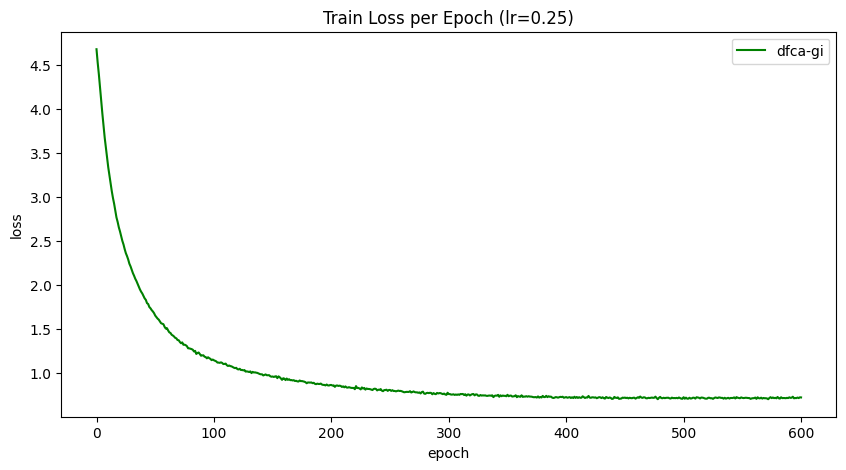

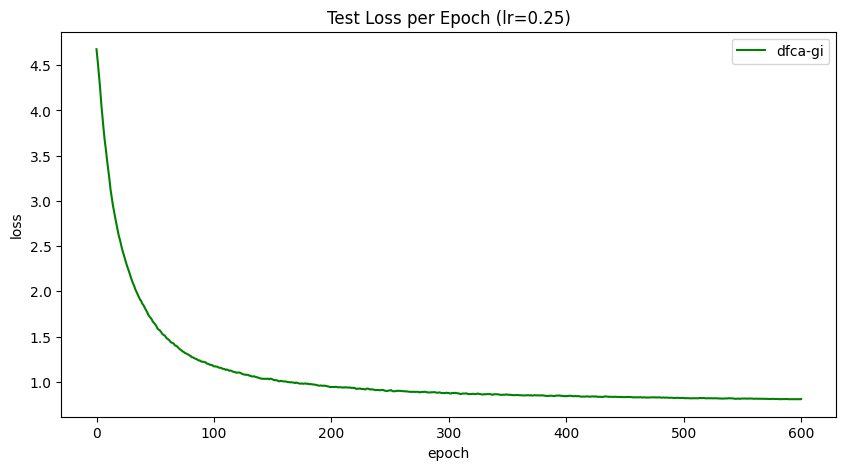

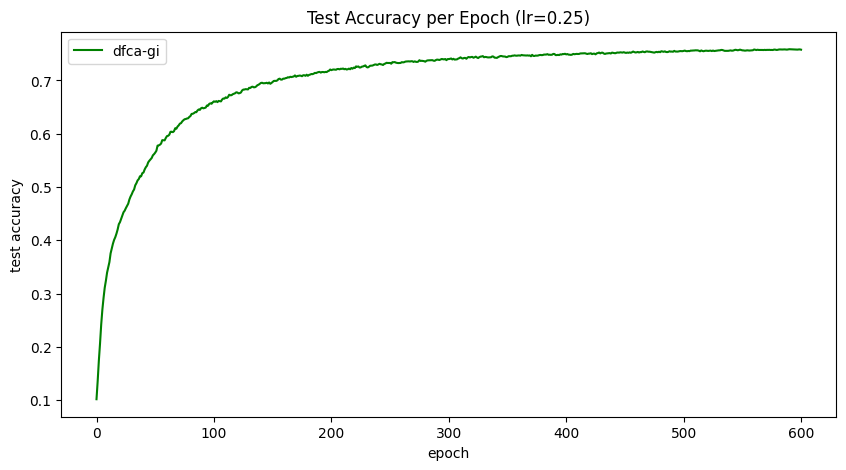

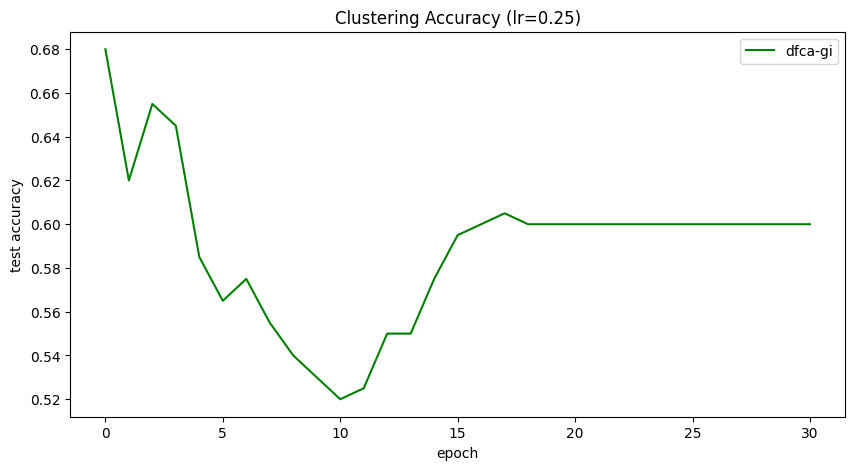

In [4]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Clustering Accuracy (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_cl_acc.png'))

